# Overview

Every single person has been applied to get a loan, lease /finance a car or house/apartment at least once in his/her life and bond investors has to consider credit risk of each applicant. Credit risk which is also known as default risk is the risk that a bond issuer will default on their payments of interest and principal.
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. The goal of this project is to be able to predict the likelihood that an applicant will experience difficulty in repaying their loan.
The two most critical questions in the lending industry are:
- 1) How risky is the borrower? 
- 2) Given the borrower’s risk, should we lend him/her?
Business Objective: Home Credit Default Risk

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. 
Home Credit needs an algorithm that will take as inputs various personal and alternative financial information originally taken from a loan applicant's profile, and then determine a probability of the applicant has at least one late payment when repaying their loan. This probability will be in the range [0.0, 1.0], where 1.0 represents a 100% certainty that the applicant will have at least one delinquent repayment and 0.0 indicates that there is zero chance that the applicant will ever be delinquent. 
The algorithm will be tested on a set of 48,744 individuals who previously borrowed from Home Credit. Home Credit knows which borrowers ultimately paid off their loans, and which ones had one or more late payments. A good algorithm will need to predict a high probability of delinquency for the majority of borrowers who did actually make one or more late payments. This algorithm will also need to predict a low probability of delinquency for the majority of borrowers who eventually did successfully repay their loans with no late payments.

 ## Data

The dataset as it is mentioned above was provided by Home Credit Group's data scientists. It contains a wide variety of personal and financial information belonging to 356,255 individuals who had previously been recipients of loans from Home Credit. These individuals are divided into training and testing sets. The training group contains 307,511 individuals' records. The test group contains 48,744 records.
 The dataset is anonymized, with each individual their loan ID. Any personally identifying, such as name, phone number, or address, has been omitted. Because Home Credit targets the unbanked population, it is unable to rely on traditional measures, such as a credit score, that mainstream financial institutions use when making lending decisions.
 Home Credit works around this obstacle by looking at an extensive and diverse array of personal and financial information for each of its applicants. These features range from common characteristics, such as marital status, age, type of housing, a region of residence, job type, and education level, to some incredible niche characteristics, such as how many elevators are in an applicant's apartment building. 
Home Credit also looks at aspects of applicants' financial backgrounds, including month-by-month payment performance on any loans or credit card balances that the applicant has previously had with Home Credit, as well as the amount and monthly repayment balances of any loans that the applicant may have received from other lenders. All of these features are spread across seven data tables. 
The main data table ('application_train.csv') contains 120 features that comprise applicants' personal background information. The other six data tables contain applicants' previous loan and credit card balance payment histories.  The following diagram provides a brief summary:

![My Title](data.png)


## Workflow
- Collecting data and applying data wrangling 
- Starting exploratory data analysis to find trends and Storytelling
- Conduct further data analysis to identify relationships between different variables
- Dimensionality reduction or Feature Selection
- Implement learning algorithms: Logistic Regression, Random Forest, Multi-layer Perceptron Classier, AdaBoost Classier, Gradient Boosting Classier
- Model Evaluation and Validation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score
from sklearn.neural_network import MLPClassifier
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [2]:
df=pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 307511 observations and 122 features in this dataset. 



In [4]:
df=df.dropna(how='all')
df.shape

(307511, 122)

In [5]:
df.iloc[:,1:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 19 columns):
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 n

## Exploratory Data Analysis

0    282686
1     24825
Name: TARGET, dtype: int64


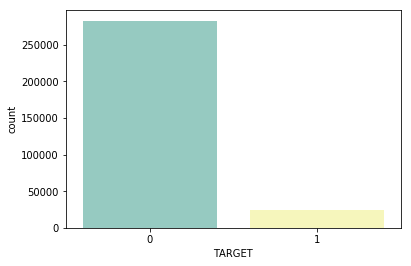

In [6]:
print(df['TARGET'].value_counts())
sns.countplot(df['TARGET'],palette='Set3')
plt.savefig('target.png',dpi=300,bbox_inches='tight')
plt.show()

Target variable (1 - client with payment diffculties: he/she had late payment
more than X days on at least one of the first Y installments of the loan in our
sample, 0 - all other cases)
#### The 'TERGET' is very imbalanced which is normal and it means around 92% were cleared to get the loan.

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


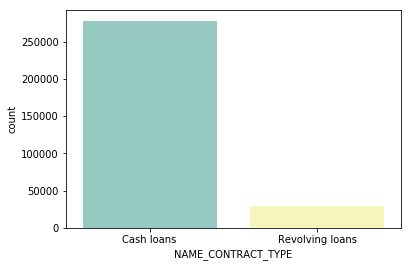

In [7]:
print(df['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(df['NAME_CONTRACT_TYPE'],palette='Set3')
plt.savefig('namecontract.png',dpi=300,bbox_inches='tight')
plt.show()

#### Around 90% of the contracts are 'Cash loans' and less than 10% are 'Revolving loans'

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


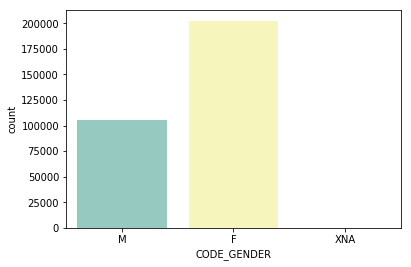

In [8]:
print(df['CODE_GENDER'].value_counts())
sns.countplot(df['CODE_GENDER'],palette='Set3')
plt.savefig('codegender.png',dpi=300,bbox_inches='tight')
plt.show()

In [9]:
a=df['CODE_GENDER'].value_counts()
a.M/(a.M+a.F)

0.34164750721121795

#### More then 66% of applicants are females.

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


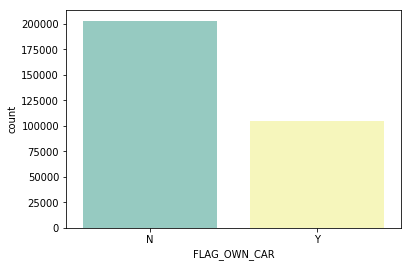

In [10]:
print(df['FLAG_OWN_CAR'].value_counts())
sns.countplot(df['FLAG_OWN_CAR'],palette='Set3')
plt.savefig('flagcar.png',dpi=300,bbox_inches='tight')
plt.show()

In [11]:
a=df['FLAG_OWN_CAR'].value_counts()
a.N/(a.N+a.Y)

0.6598918412674668

Flag if the client owns a car
#### Around 66% of applicants do not have their own car.

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


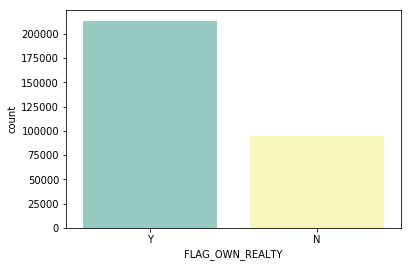

In [12]:
print(df['FLAG_OWN_REALTY'].value_counts())
sns.countplot(df['FLAG_OWN_REALTY'],palette='Set3')
plt.savefig('flagown.png',dpi=300,bbox_inches='tight')
plt.show()

In [13]:
a=df['FLAG_OWN_REALTY'].value_counts()
a.N/(a.N+a.Y)

0.30632725333402705

Flag if client owns a house or flat
#### Around 70% of the applicants have  their own realty.

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


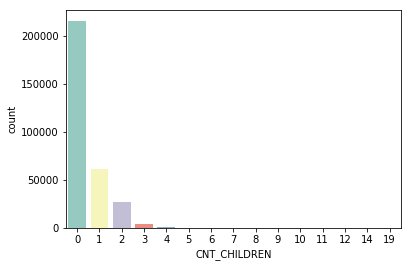

In [14]:
print(df['CNT_CHILDREN'].value_counts())
sns.countplot(df['CNT_CHILDREN'],palette="Set3")
plt.show() #Number of children the client has

In [15]:
df['AMT_INCOME_TOTAL'].describe()['mean']

168797.9192969845

#### The Average income is 168,798$

In [16]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [17]:
df['AMT_CREDIT'].describe()['mean']

599025.9997057016

#### The average Credit amount of the loan is 599,026$

In [18]:
df['AMT_GOODS_PRICE'].describe()['mean']

538396.2074288895

#### 'AMT_GOODS_PRICE': For consumer loans it is the price of the goods for which the loan is given

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


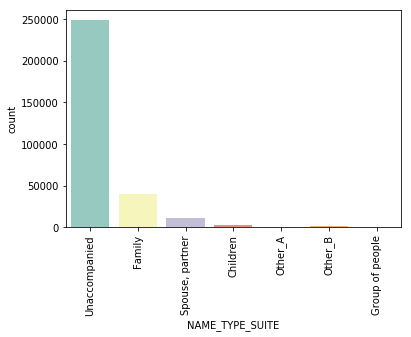

<Figure size 432x288 with 0 Axes>

In [19]:
print(df['NAME_TYPE_SUITE'].value_counts())
sns.countplot(df['NAME_TYPE_SUITE'],palette="Set3")
plt.xticks(rotation=90)
plt.show() #Who was accompanying client when he was applying for the loan
plt.savefig('nametype.png',dpi=300,bbox_inches='tight')

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


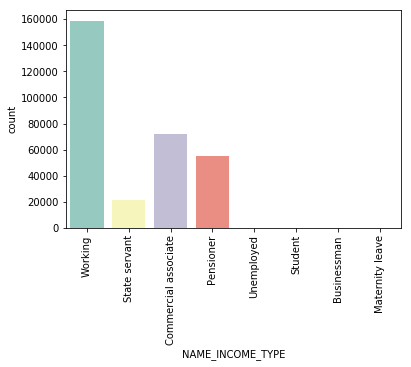

In [20]:
print(df['NAME_INCOME_TYPE'].value_counts())
sns.countplot(df['NAME_INCOME_TYPE'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameincome.png',dpi=300,bbox_inches='tight')
plt.show() #Clients income type (businessman, working, maternity leave, ...)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


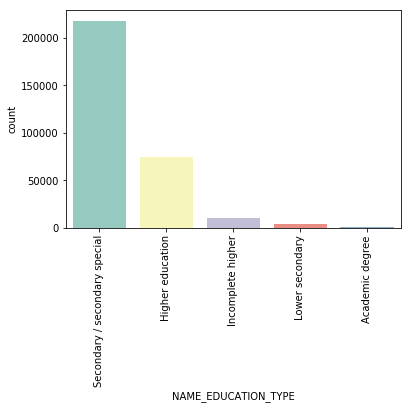

In [21]:
print(df['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(df['NAME_EDUCATION_TYPE'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameedu',dpi=300,bbox_inches='tight')
plt.show() #Level of highest education the client achieved

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


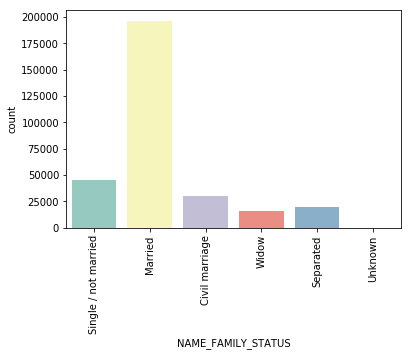

In [22]:
print(df['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(df['NAME_FAMILY_STATUS'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameFam.png',dpi=300,bbox_inches='tight')
plt.show() #Family status of the client

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


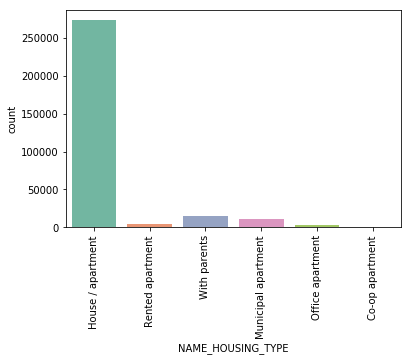

In [23]:
print(df['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(df['NAME_HOUSING_TYPE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #What is the housing situation of the client (renting, living with parents, ...)

In [24]:
df['REGION_POPULATION_RELATIVE'].describe() 
#Normalized population of region where client lives (higher number means the client lives in more populated region)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [25]:
df['DAYS_BIRTH'].describe()
#Client's age in days at the time of application-time only relative to the application

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [26]:
df['DAYS_EMPLOYED'].describe()
#How many days before the application the person started current employment-time only relative to the application

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### Change columns with string values to integers

In [27]:
df=df[df['CODE_GENDER']!='XNA']
df['NAME_CONTRACT_TYPE']=pd.get_dummies(df['NAME_CONTRACT_TYPE'])['Cash loans']
df['CODE_GENDER']=pd.get_dummies(df['CODE_GENDER'])['F']
df['FLAG_OWN_CAR']=pd.get_dummies(df['FLAG_OWN_CAR'])['Y']
df['FLAG_OWN_REALTY']=pd.get_dummies(df['FLAG_OWN_REALTY'])['Y']
df.NAME_INCOME_TYPE = pd.Categorical(df.NAME_INCOME_TYPE)
df['NAME_INCOME_TYPE'] = df.NAME_INCOME_TYPE.cat.codes
df.NAME_EDUCATION_TYPE = pd.Categorical(df.NAME_EDUCATION_TYPE)
df['NAME_EDUCATION_TYPE'] = df.NAME_EDUCATION_TYPE.cat.codes
dict3={'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3,
       'Separated':4, 'Unknown':5}
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].map(dict3)
dict4={'House / apartment':0, 'Rented apartment':1, 'With parents':2,
       'Municipal apartment':3, 'Office apartment':4, 'Co-op apartment':5}
df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].map(dict4)
dict5={'WEDNESDAY':2, 'MONDAY':0, 'THURSDAY':3, 'SUNDAY':6, 'SATURDAY':5, 'FRIDAY':4,
       'TUESDAY':1}
df['WEEKDAY_APPR_PROCESS_START']=df['WEEKDAY_APPR_PROCESS_START'].map(dict5)
dict6={'Business Entity Type 3':0, 'School':1, 'Government':2, 'Religion':3,
       'Other':4, 'XNA':5, 'Electricity':6, 'Medicine':7,
       'Business Entity Type 2':8, 'Self-employed':9, 'Transport: type 2':10,
       'Construction':11, 'Housing':12, 'Kindergarten':13, 'Trade: type 7':14,
       'Industry: type 11':15, 'Military':16, 'Services':17, 'Security Ministries':18,
       'Transport: type 4':19, 'Industry: type 1':20, 'Emergency':21, 'Security':22,
       'Trade: type 2':23, 'University':24, 'Transport: type 3':25, 'Police':26,
       'Business Entity Type 1':27, 'Postal':28, 'Industry: type 4':29,
       'Agriculture':30, 'Restaurant':31, 'Culture':32, 'Hotel':33,
       'Industry: type 7:':34, 'Trade: type 3':35, 'Industry: type 3':36, 'Bank':37,
       'Industry: type 9':38, 'Insurance':39, 'Trade: type 6':40,
       'Industry: type 2':41, 'Transport: type 1':42, 'Industry: type 12':43,
       'Mobile':57, 'Trade: type 1':44, 'Industry: type 5':45, 'Industry: type 10':46,
       'Legal Services':47, 'Advertising':48, 'Trade: type 5':49, 'Cleaning':50,
       'Industry: type 13':51, 'Trade: type 4':52, 'Telecom':53,
       'Industry: type 8':54, 'Realtor':55, 'Industry: type 6':56}
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].map(dict6)
dict7={'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3,
       'Other_A':4,  'Other_B':5, 'Group of people':6}
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].map(dict7)
dict8={'Laborers':0, 'Core staff':1, 'Accountants':2, 'Managers':3, 
       'Drivers':4, 'Sales staff':5, 'Cleaning staff':6, 'Cooking staff':7,
       'Private service staff':8, 'Medicine staff':9, 'Security staff':10,
       'High skill tech staff':11, 'Waiters/barmen staff':12,
       'Low-skill Laborers':13, 'Realty agents':14, 'Secretaries':15, 'IT staff':16,
       'HR staff':17}
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].map(dict8)
dict9={'reg oper account':0,'org spec account':1,
       'reg oper spec account':2, 'not specified':3}
df['FONDKAPREMONT_MODE']=df['FONDKAPREMONT_MODE'].map(dict9)
dict10={'block of flats':0, 'terraced house':1, 'specific housing':2}
df['HOUSETYPE_MODE']=df['HOUSETYPE_MODE'].map(dict10)
dict11={'Stone, brick':0, 'Block':1,'Panel':2, 'Mixed':3, 'Wooden':4, 'Others':5,
       'Monolithic':6}
df['WALLSMATERIAL_MODE']=df['WALLSMATERIAL_MODE'].map(dict11)
dict12={'No':0, 'Yes':1}
df['EMERGENCYSTATE_MODE']=df['EMERGENCYSTATE_MODE'].map(dict12)

## Feature selecion 

### 1. Percent missing values

In [28]:
desc=df.describe().T
desc['missing %']=1-(desc['count']/len(df))

#### Remove the columns with more than 50% missing value

In [29]:
df.drop(list(desc[desc['missing %']>0.5]['missing %'].index),axis=1,inplace=True)

### 2. Check the variance of each column
#### Remove the columns with very small variance

In [30]:
df.drop(list(desc[desc['std']<0.005]['std'].index),inplace=True,axis=1)

### 3. Pairwise Correlatiosn

In [31]:
print(df.shape)
Correlation=df.corr()

(307507, 78)


In [32]:
HighCorr=np.sum(Correlation>0.7)
HighCorrIndex=HighCorr[HighCorr>1].index
HighCorrIndex

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [33]:
Remove=[] #Make a list of correlated columns

In [34]:
Correlation['CNT_CHILDREN'][Correlation['CNT_CHILDREN']>0.7] #{CNT_FAM_MEMBERS,'CNT_CHILDREN' }

CNT_CHILDREN       1.000000
CNT_FAM_MEMBERS    0.879159
Name: CNT_CHILDREN, dtype: float64

In [35]:
Correlation['TARGET'][['CNT_FAM_MEMBERS','CNT_CHILDREN']] #Keepe the one with higher corrlation with the target

CNT_FAM_MEMBERS    0.009310
CNT_CHILDREN       0.019189
Name: TARGET, dtype: float64

In [36]:
Remove.append('CNT_FAM_MEMBERS')

In [37]:
Correlation['AMT_CREDIT'][Correlation['AMT_CREDIT']>0.7]#{'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'}

AMT_CREDIT         1.000000
AMT_ANNUITY        0.770137
AMT_GOODS_PRICE    0.986971
Name: AMT_CREDIT, dtype: float64

In [38]:
Correlation['TARGET'][['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

AMT_CREDIT        -0.030371
AMT_ANNUITY       -0.012818
AMT_GOODS_PRICE   -0.039647
Name: TARGET, dtype: float64

In [39]:
Remove.append('AMT_CREDIT')
Remove.append('AMT_ANNUITY')

In [40]:
Correlation[ 'REGION_RATING_CLIENT_W_CITY'][Correlation[ 'REGION_RATING_CLIENT_W_CITY']>0.7]
#{REGION_RATING_CLIET,REGION_RATING_CLIENT_W_CITY}

REGION_RATING_CLIENT           0.950842
REGION_RATING_CLIENT_W_CITY    1.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [41]:
Correlation['TARGET'][['REGION_RATING_CLIET','REGION_RATING_CLIENT_W_CITY']]
Remove.append('REGION_RATING_CLIENT_W_CITY')

C:\Python\Anaconda3\lib\site-packages\pandas\core\series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [42]:
Correlation['REG_REGION_NOT_WORK_REGION'][Correlation['REG_REGION_NOT_WORK_REGION']>0.7]
#{'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION'}
Correlation['TARGET'][['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION']]
Remove.append('LIVE_REGION_NOT_WORK_REGION')

In [43]:
Correlation['REG_CITY_NOT_WORK_CITY'][Correlation['REG_CITY_NOT_WORK_CITY']>0.7]
#{'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'}
Correlation['TARGET'][['REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']]
Remove.append('LIVE_CITY_NOT_WORK_CITY')

In [44]:
Correlation['YEARS_BEGINEXPLUATATION_AVG'][Correlation['YEARS_BEGINEXPLUATATION_AVG']>0.7]
#{'YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI'}
Correlation['TARGET'][['YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI']]
Remove.append('YEARS_BEGINEXPLUATATION_MODE')
Remove.append('YEARS_BEGINEXPLUATATION_AVG')

In [45]:
Correlation['FLOORSMAX_AVG'][Correlation['FLOORSMAX_AVG']>0.7]
#{'FLOORSMAX_AVG',FLOORSMAX_MODE,FLOORSMAX_MEDI  }
Correlation['TARGET'][['FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI']]
Remove.append('FLOORSMAX_MODE')
Remove.append('FLOORSMAX_MEDI')

In [46]:
#{ 'OBS_30_CNT_SOCIAL_CIRCLE',''OBS_60_CNT_SOCIAL_CIRCLE''}
#{'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'}
Correlation['OBS_30_CNT_SOCIAL_CIRCLE'][Correlation['OBS_30_CNT_SOCIAL_CIRCLE']>0.7]
Remove.append('OBS_60_CNT_SOCIAL_CIRCLE')
Remove.append('DEF_60_CNT_SOCIAL_CIRCLE')

In [47]:
df.drop(Remove,inplace=True,axis=1)

### 3. Correlation with the Target

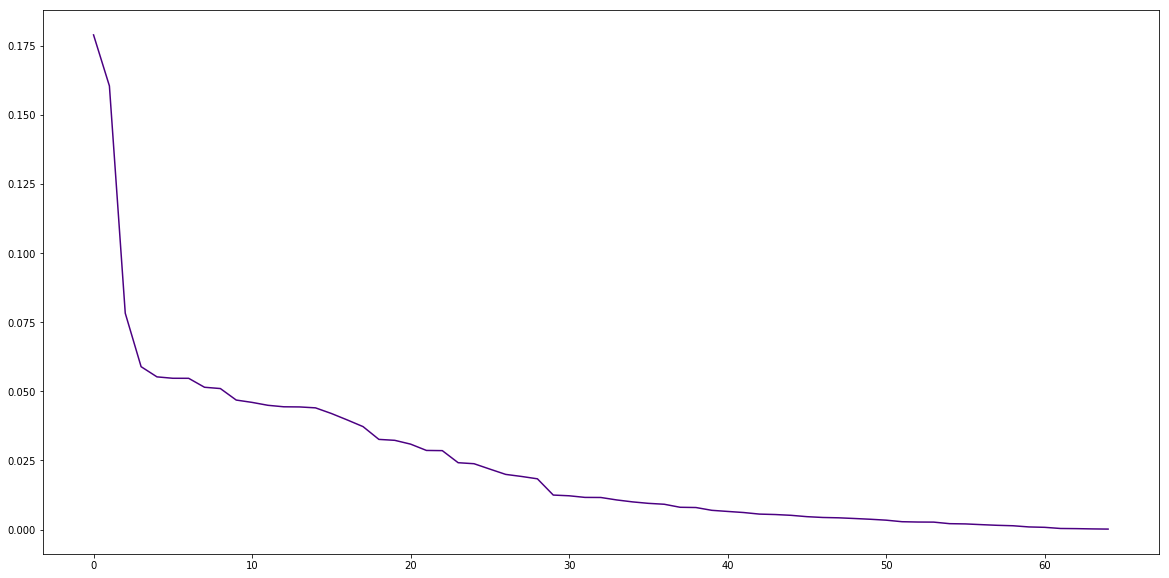

<Figure size 432x288 with 0 Axes>

In [48]:
Corr1=abs(df.corr()['TARGET'])

plt.figure(figsize=(20,10))
plt.plot(Corr1.drop('TARGET').sort_values(ascending=False).reset_index()['TARGET'],color='indigo')
plt.show()
plt.savefig('CorrTarget.png',dpi=300,bbox_inches='tight')

#### The elbow point is around 35

In [49]:
Corr1.sort_values(ascending=False)[1:35].index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE',
       'FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG', 'DAYS_REGISTRATION',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE', 'FLAG_DOCUMENT_6',
       'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN',
       'NAME_HOUSING_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_13', 'NAME_FAMILY_STATUS'],
      dtype='object')

#### Pick the most correlated columns with Target

In [50]:
df=df[['TARGET','EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE',
       'FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG', 'DAYS_REGISTRATION',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE', 'FLAG_DOCUMENT_6',
       'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE',
       'FLAG_OWN_CAR', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN',
       'NAME_HOUSING_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_13', 'NAME_FAMILY_STATUS']]

Feature Selection steps:
- **I removed the columns with more than 50% NaN values (41 columns)**
- **I removed the columns with variance less than 0.005 (3 columns) **
- **I found the correclation of the remaining columns with the Target, I plot them in ascending order, I found the elbow point which was around 35, and I picked the first 35th columns with higher correlation with the Target.**

### Fill NaN values

In [51]:
col1=list(df.dtypes[df.dtypes=='float64'].index)
col2=list(df.dtypes[df.dtypes=='int64'].index)

In [52]:
df[col2].describe().T[['min','max']]

,min,max
TARGET,0.0,1.0
DAYS_BIRTH,-25229.0,-7489.0
REGION_RATING_CLIENT,1.0,3.0
DAYS_ID_PUBLISH,-7197.0,0.0
REG_CITY_NOT_WORK_CITY,0.0,1.0
FLAG_EMP_PHONE,0.0,1.0
DAYS_EMPLOYED,-17912.0,365243.0
REG_CITY_NOT_LIVE_CITY,0.0,1.0
FLAG_DOCUMENT_3,0.0,1.0
FLAG_DOCUMENT_6,0.0,1.0


In [53]:
col1.extend(['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_EMPLOYED'])
col2.remove('DAYS_BIRTH')
col2.remove('DAYS_ID_PUBLISH')
col2.remove('DAYS_EMPLOYED')


#### Fill NaN values of columns with float values with average, Fill NaN values of columns with integer values with the max value counts

In [54]:
df[col1]=df[col1].fillna(df[col1].mean())

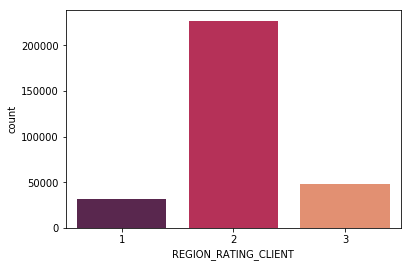

In [55]:
sns.countplot(df['REGION_RATING_CLIENT'],palette='rocket')
plt.show()

df['REGION_RATING_CLIENT']=df['REGION_RATING_CLIENT'].fillna(2)

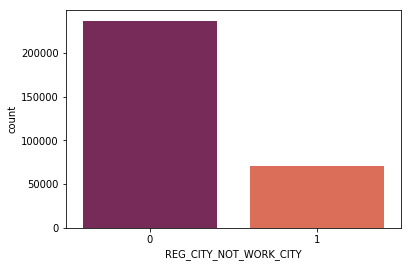

In [56]:
sns.countplot(df['REG_CITY_NOT_WORK_CITY'],palette='rocket')
plt.show()

df['REG_CITY_NOT_WORK_CITY']=df['REG_CITY_NOT_WORK_CITY'].fillna(0)

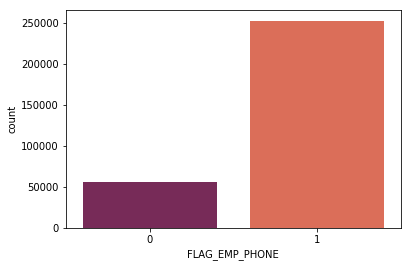

In [57]:
sns.countplot(df['FLAG_EMP_PHONE'],palette='rocket')
plt.show()
df['FLAG_EMP_PHONE']=df['FLAG_EMP_PHONE'].fillna(1)

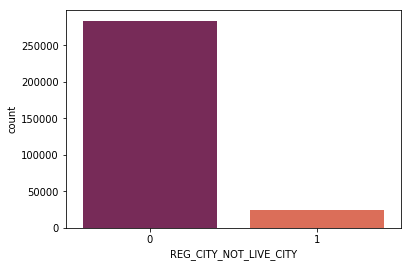

In [58]:
sns.countplot(df['REG_CITY_NOT_LIVE_CITY'],palette='rocket')
plt.show()
df['REG_CITY_NOT_LIVE_CITY']=df['REG_CITY_NOT_LIVE_CITY'].fillna(0)

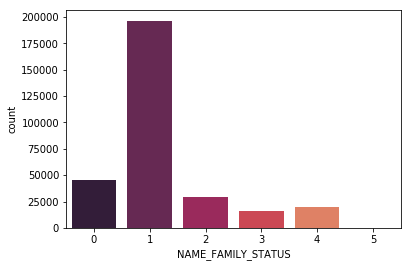

In [59]:
sns.countplot(df['NAME_FAMILY_STATUS'],palette='rocket')
plt.show()

df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].fillna(1)

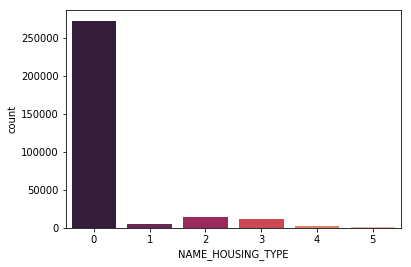

In [60]:
sns.countplot(df['NAME_HOUSING_TYPE'],palette='rocket')
plt.show()

df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].fillna(0)

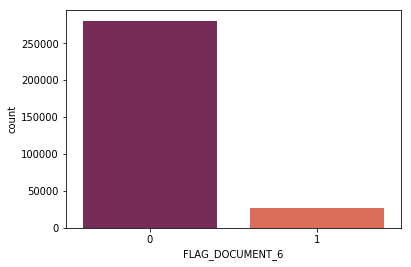

In [61]:
sns.countplot(df['FLAG_DOCUMENT_6'],palette='rocket')
plt.show()
df['FLAG_DOCUMENT_6']=df['FLAG_DOCUMENT_6'].fillna(0)

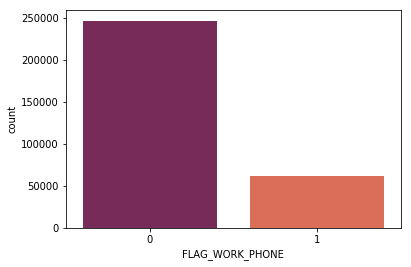

In [62]:
sns.countplot(df['FLAG_WORK_PHONE'],palette='rocket')
plt.show()
df['FLAG_WORK_PHONE']=df['FLAG_WORK_PHONE'].fillna(0)

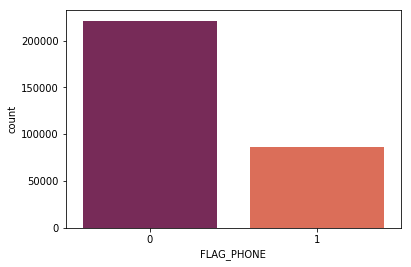

In [63]:
sns.countplot(df['FLAG_PHONE'],palette='rocket')
plt.show()

df['FLAG_PHONE']=df['FLAG_PHONE'].fillna(0)

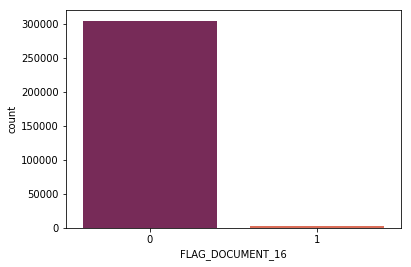

In [64]:
sns.countplot(df[ 'FLAG_DOCUMENT_16'],palette='rocket')
plt.show()
df['FLAG_DOCUMENT_16']=df['FLAG_DOCUMENT_16'].fillna(0)

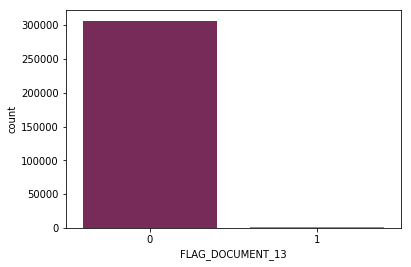

In [65]:
sns.countplot(df[ 'FLAG_DOCUMENT_13'],palette='rocket')
plt.show()

df[ 'FLAG_DOCUMENT_13']=df[ 'FLAG_DOCUMENT_13'].fillna(0)

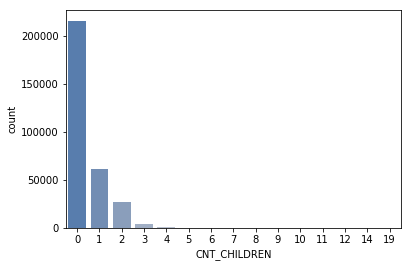

In [66]:
sns.countplot(df['CNT_CHILDREN'],palette="vlag")
plt.show()
df['CNT_CHILDREN']=df['CNT_CHILDREN'].fillna(0)

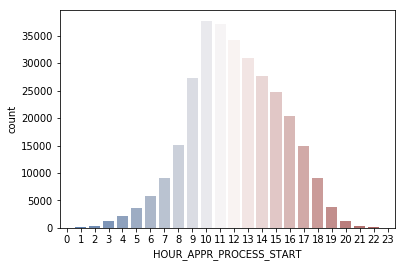

In [67]:
sns.countplot(df['HOUR_APPR_PROCESS_START'],palette="vlag")
plt.show()
df['HOUR_APPR_PROCESS_START']=df['HOUR_APPR_PROCESS_START'].fillna(11)

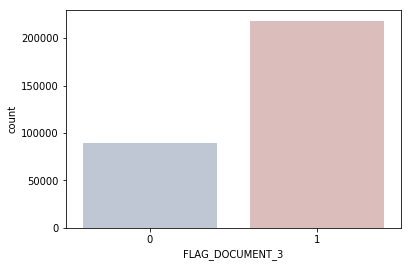

In [68]:
sns.countplot(df['FLAG_DOCUMENT_3'],palette="vlag")
plt.show()

df['FLAG_DOCUMENT_3']=df['FLAG_DOCUMENT_3'].fillna(1)


### 4. Weight of evidence and Information Value

Weight of evidence (WOE) and Information value (IV) are simple, yet powerful techniques to perform variable transformation and selection. These concepts have huge connection with the logistic regression modeling technique. It is widely used in credit scoring to measure the separation of good vs bad customers.


The advantages of WOE transformation are:
- Handles missing values
- Handles outliers
- The transformation is based on logarithmic value of distributions. This is aligned with the logistic regression output function
- No need for dummy variables
- By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable Also, IV value can be used to select variables quickly.

from https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb

In [69]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 


In [70]:
final_iv, IV = data_vars(df,df.TARGET)

In [71]:
L_IV=list(IV.sort_values('IV',ascending=False)['VAR_NAME'].head(25))
L_IV.append('TARGET')
Train=df[L_IV]

### Histogram of the selected features

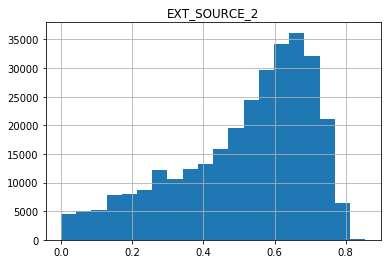

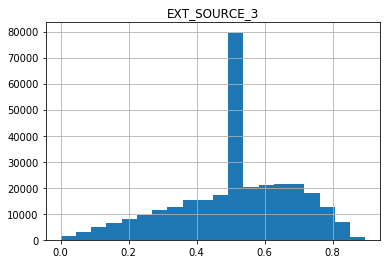

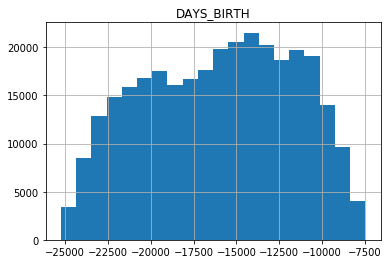

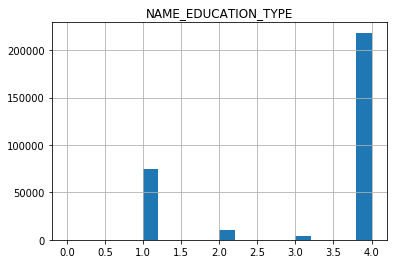

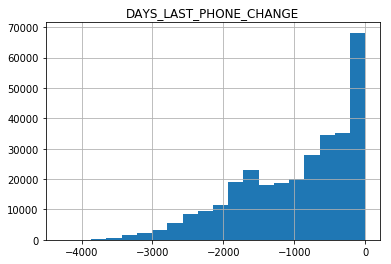

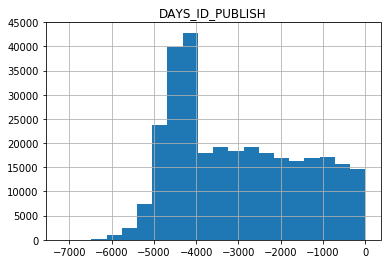

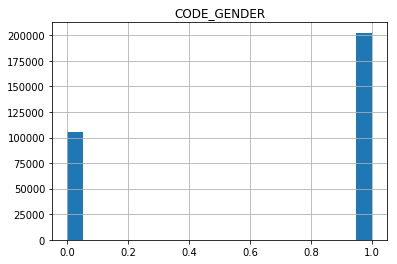

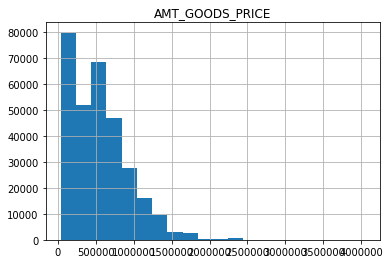

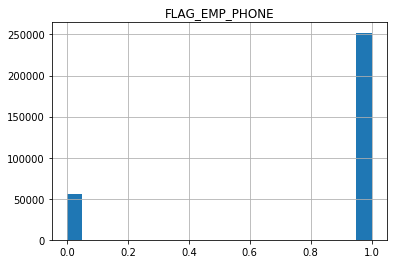

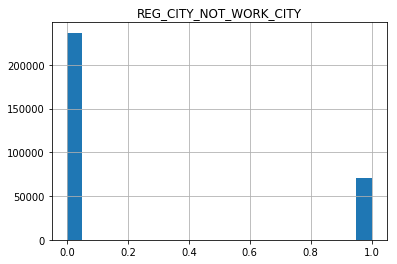

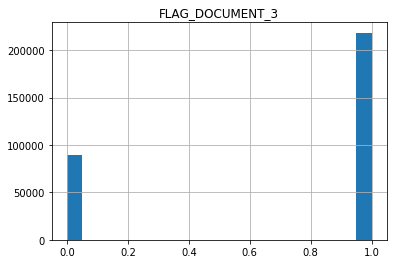

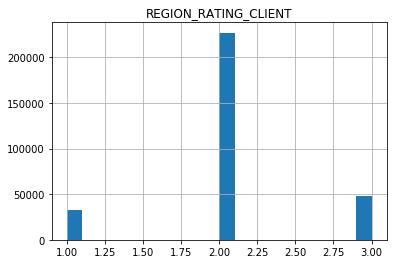

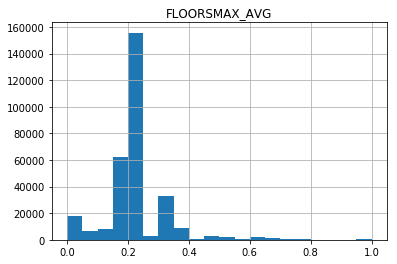

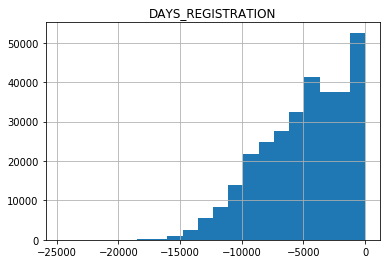

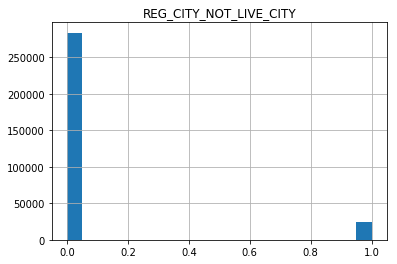

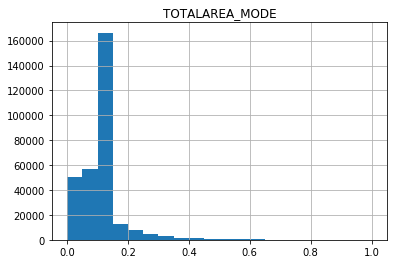

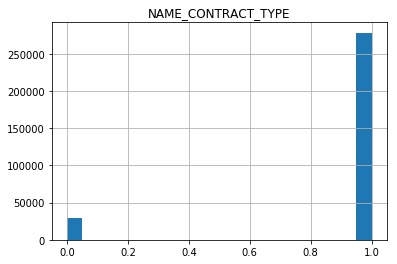

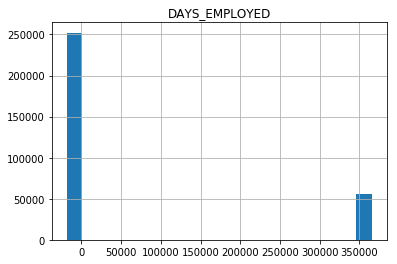

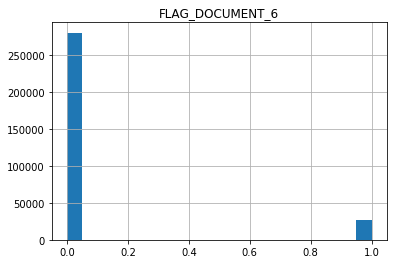

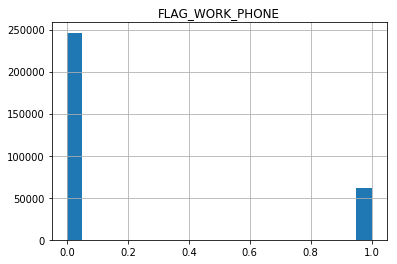

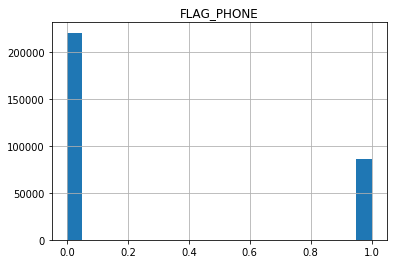

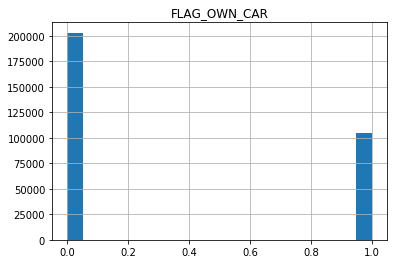

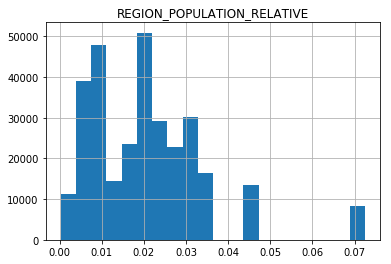

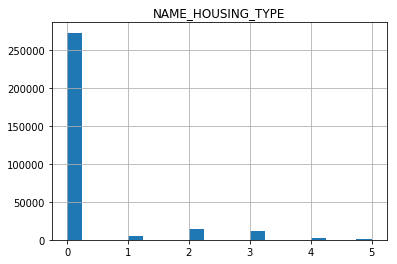

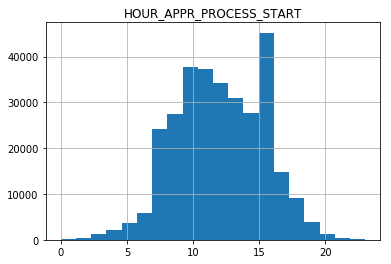

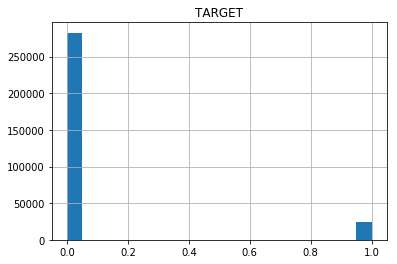

In [72]:
Cols=list(Train.columns)
for i in Cols:
    Train[i].hist(bins=20)
    plt.title(i)
    plt.show() 

# Classification


#### Split Train dataset for training process (The X_test, y_test is like a validation step in the whole process.)

In [73]:
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [74]:
y.value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

#### Unbalanced Target values. AUC is the best  performance metrics.

### 1. Logistic Regression

Correct accuracy of the train set with Logistic Regression is: 91.9198 %
Correct accuracy of the test set with Logistic Regression is: 91.9352 %

Total elapsed time is: 3.0186  sec

Confusion Matrix is:
[[84758    62]
 [ 7378    55]]

Logistic Regression log_loss is: 2.7855

Average precision-recall score: 0.0835


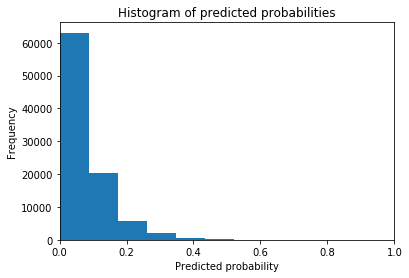

In [75]:
LogClassifier= LogisticRegression(random_state = 0)
start=time.time()
LogClassifier.fit(X_train, y_train)
end=time.time()
y_pred=LogClassifier.predict(X_test)
y_pred_prob=LogClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=LogClassifier.predict_proba(X_train)[:, 1]

print('Correct accuracy of the train set with Logistic Regression is:', round(LogClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Logistic Regression is:', round(LogClassifier.score(X_test,y_test)*100,4),'%')
print('')
print('Total elapsed time is:', round(end-start,4),' sec')
#start=time.time()
#LogScores = cross_val_score(LogClassifier, X, y, cv=5)
#end=time.time()
#print('Logistic Regression score mean with cross val is:',round(np.mean(LogScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Logistic Regression log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

In [76]:
# predict diabetes if the predicted probability is greater than 0.1
from sklearn.preprocessing import binarize
y_pred= binarize([y_pred_prob], 0.1)[0]

# new confusion matrix (threshold of 0.1)
print(metrics.confusion_matrix(y_test, y_pred))

[[65164 19656]
 [ 3188  4245]]


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity


#### Compute ROC Curve  and Area Under the Curve (AUC)

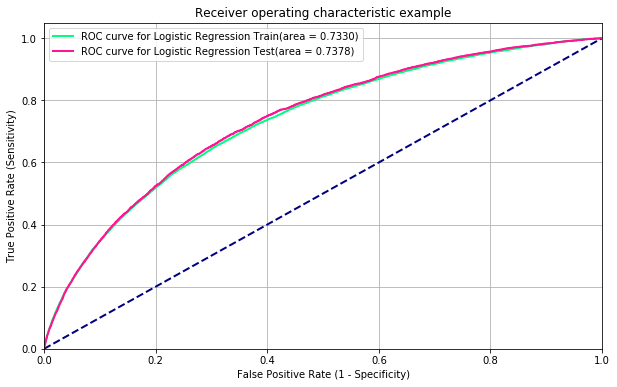

<Figure size 432x288 with 0 Axes>

In [77]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Logistic Regression Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Logistic Regression Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('LG.png',dpi=300,bbox_inches='tight')
y_log=y_test
y_pred_log=y_pred_prob

ResultLG={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [78]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [79]:
evaluate_threshold(0.1)

Sensitivity: 0.571101843131979
Specificity: 0.7689577929733553


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [80]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))

0.6696820227213774


#### calculate cross-validated AUC

- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

### 2. Random Forest

Total elapsed time is: 27.4818  sec
Correct accuracy of the train set with Random Forest Classifier is: 98.5622 %
Correct accuracy of the test set with Random Forest Classifier is: 91.765 %


Confusion Matrix is:
[[84511   309]
 [ 7288   145]]

Random Forest log_loss is: 2.8443

Average precision-recall score: 0.0852


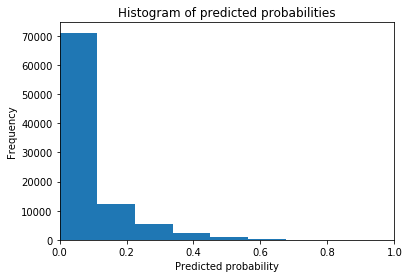

In [81]:
RandClassifier= RandomForestClassifier(random_state = 0)
start=time.time()
RandClassifier.fit(X_train, y_train)
end=time.time()
y_pred=RandClassifier.predict(X_test)
y_pred_prob=RandClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=RandClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Random Forest Classifier is:', round(RandClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Random Forest Classifier is:', round(RandClassifier.score(X_test,y_test)*100,4),'%')
print('')
#start=time.time()
#RandScores = cross_val_score(RandClassifier, X, y, cv=5)
#end=time.time()
#print('Random Forest score mean with cross val is:',round(np.mean(RandScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Random Forest log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))

plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

#### Compute ROC Curve 

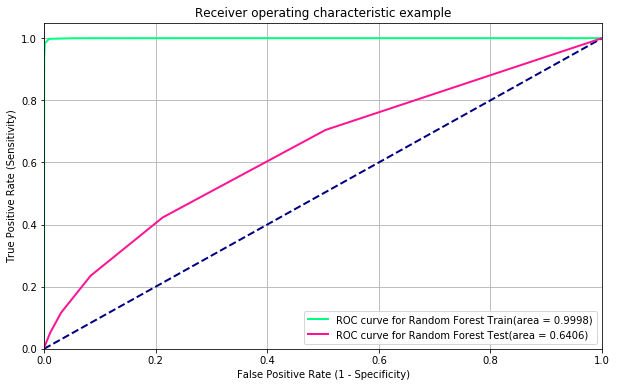

<Figure size 432x288 with 0 Axes>

In [82]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
roc_aucTrain=roc_auc
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Random Forest Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Random Forest Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('RF1.png',dpi=300,bbox_inches='tight')
y_RF=y_test
y_pred_RF=y_pred_prob

ResultRF1={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

#### We have overfitting with Random Forest. I set the hyperparameters to overcome the overfitting.

- n_estimators = number of trees in the foreset
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

### 3. Random Forest with Hyperparameters

In [83]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop =100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [84]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train,y_train)

In [85]:
RandClassifier= RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=2,random_state=0)
start=time.time()
RandClassifier.fit(X_train, y_train)
end=time.time()
y_pred=RandClassifier.predict(X_test)
y_pred_prob=RandClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=RandClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Random Forest Classifier is:', round(RandClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Random Forest Classifier is:', round(RandClassifier.score(X_test,y_test)*100,4),'%')
#print('')
#start=time.time()
#RandScores = cross_val_score(RandClassifier, X, y, cv=5)
#end=time.time()
#print('Random Forest score Mean with cross val is:',round(np.mean(RandScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Random Forest log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 133.465  sec
Correct accuracy of the train set with Random Forest Classifier is: 91.9393 %
Correct accuracy of the test set with Random Forest Classifier is: 91.945 %

Confusion Matrix is:
[[84820     0]
 [ 7431     2]]

Random Forest log_loss is: 2.7821

Average precision-recall score: 0.0808


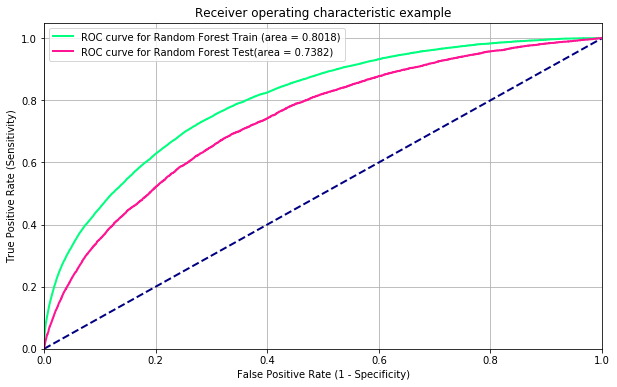

<Figure size 432x288 with 0 Axes>

In [86]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
roc_aucTrain=roc_auc
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Random Forest Train (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Random Forest Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('RF2.png',dpi=300,bbox_inches='tight')
y_RF2=y_test
y_pred_RF2=y_pred_prob

ResultRF2={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

### 4. Gradient Boosting Classifier

In [87]:
GradClassifier = GradientBoostingClassifier(random_state=0)
start=time.time()
GradClassifier.fit(X_train, y_train)
end=time.time()
y_pred=GradClassifier.predict(X_test)
y_pred_prob=GradClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=GradClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_test,y_test)*100,4),'%')
print('')
#start=time.time()
#GradScores = cross_val_score(GradClassifier, X, y, cv=5)
#end=time.time()
#print('Gradient boosting score Mean with cross val is:',round(np.mean(GradScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
#print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 136.039  sec
Correct accuracy of the train set with Gradient Boosting Classifier is: 91.9667 %
Correct accuracy of the test set with Gradient Boosting Classifier is: 91.9504 %

Confusion Matrix is:
[[84731    89]
 [ 7337    96]]

GradClassifier log_loss is: 2.7802

Average precision-recall score: 0.0862


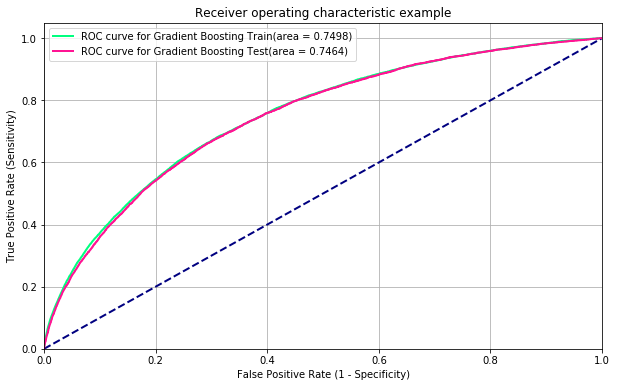

<Figure size 432x288 with 0 Axes>

In [88]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
roc_aucTrain=roc_auc
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Gradient Boosting Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Gradient Boosting Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('GB1.png',dpi=300,bbox_inches='tight')
y_GB=y_test
y_pred_GB=y_pred_prob

ResultGB1={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

### 5. Gradient Boosting with HyperParameters

In [89]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
#gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
#param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#start=time.time()
#gsearch3.fit(X_train,y_train)
#end=time.time()
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_
#gsearch3.best_params_ {'min_samples_leaf': 60, 'min_samples_split': 1800}
#gsearch3.best_score_:0.737325692522092

Total elapsed time is: 88.794  sec
Correct accuracy of the train set with Gradient Boosting Classifier is: 91.9941 %
Correct accuracy of the test set with Gradient Boosting Classifier is: 91.9396 %

Confusion Matrix is:
[[84714   106]
 [ 7330   103]]

GradClassifier log_loss is: 2.784

Average precision-recall score: 0.0863


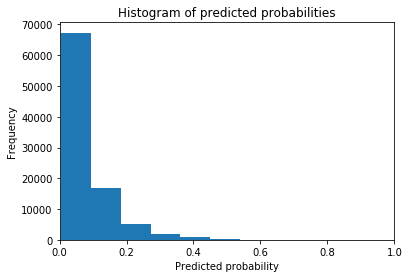

In [90]:
GradClassifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', 
                                            subsample=0.8, random_state=0,min_samples_leaf=60, min_samples_split=1800) 
start=time.time()
GradClassifier.fit(X_train, y_train)
end=time.time()
y_pred=GradClassifier.predict(X_test)
y_pred_prob=GradClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=GradClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_test,y_test)*100,4),'%')
print('')
#start=time.time()
#GradScores = cross_val_score(GradClassifier, X, y, cv=5)
#end=time.time()
#print('Gradient boosting score Mean with cross val is:',round(np.mean(GradScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
#print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

#### Compute ROC Curve 

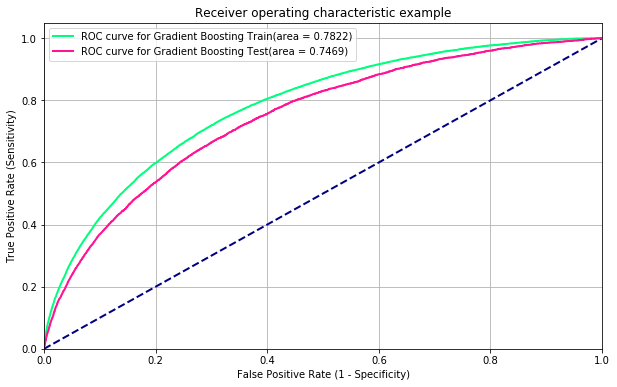

<Figure size 432x288 with 0 Axes>

In [91]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Gradient Boosting Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Gradient Boosting Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('GB2.png',dpi=300,bbox_inches='tight')
y_GB2=y_test
y_pred_GB2=y_pred_prob
ResultGB2={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

### 6. Gradient Boosting with 15 Features

#### Feature Importance with GB

[ 97.71527792 100.          40.35424276   8.61277296  20.50157192
  29.80225549   9.98024181  38.04123812   0.72383908   1.31669479
   4.17626891   4.27884176   7.73876946  23.63027505   4.04343742]



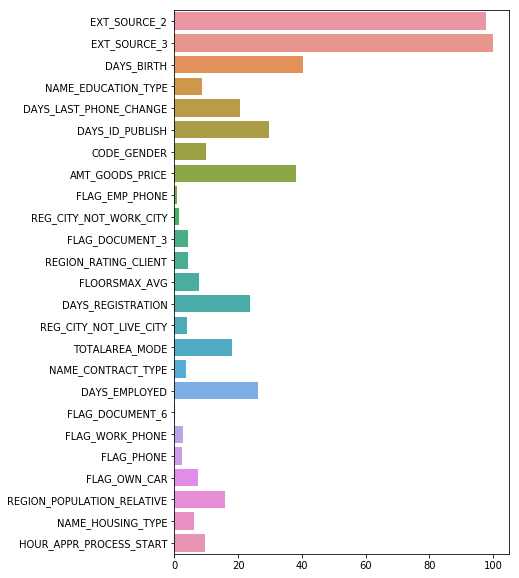

<Figure size 432x288 with 0 Axes>

In [92]:
feature_importance =GradClassifier.feature_importances_
#make importances relative to max importance
FeaturesImp=100.0 * (feature_importance / feature_importance.max())
print(FeaturesImp[:15])
print('')
#print(np.argsort(FeaturesImp[:20]))
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=FeaturesImp)
plt.show()
plt.savefig('featues.png',dpi=300,bbox_inches='tight')

#### Top 15 important features are:

In [93]:
X.columns[list(np.argsort(FeaturesImp))[::-1][:15]] 

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'AMT_GOODS_PRICE',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_LAST_PHONE_CHANGE', 'TOTALAREA_MODE',
       'REGION_POPULATION_RELATIVE', 'CODE_GENDER', 'HOUR_APPR_PROCESS_START',
       'NAME_EDUCATION_TYPE', 'FLOORSMAX_AVG', 'FLAG_OWN_CAR'],
      dtype='object')

#### Gradient Boosting with 15 selected features

In [94]:
X=Train.drop('TARGET',axis=1).iloc[:,list(np.argsort(FeaturesImp))[::-1][:15]]
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

GradClassifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', 
                                            subsample=0.8, random_state=0,min_samples_leaf=60, min_samples_split=1800) 
start=time.time()
GradClassifier.fit(X_train, y_train)
end=time.time()
y_pred=GradClassifier.predict(X_test)
y_pred_prob=GradClassifier.predict_proba(X_test)[:, 1]
y_train_pred_prob=GradClassifier.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Gradient Boosting Classifier is:', round(GradClassifier.score(X_test,y_test)*100,4),'%')
print('')
#start=time.time()
#GradScores = cross_val_score(GradClassifier, X, y, cv=5)
#end=time.time()
#print('Gradient boosting score Mean with cross val is:',round(np.mean(GradScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
#print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 48.1607  sec
Correct accuracy of the train set with Gradient Boosting Classifier is: 92.0053 %
Correct accuracy of the test set with Gradient Boosting Classifier is: 91.9168 %

Confusion Matrix is:
[[84700   120]
 [ 7337    96]]

GradClassifier log_loss is: 2.7918

Average precision-recall score: 0.0853


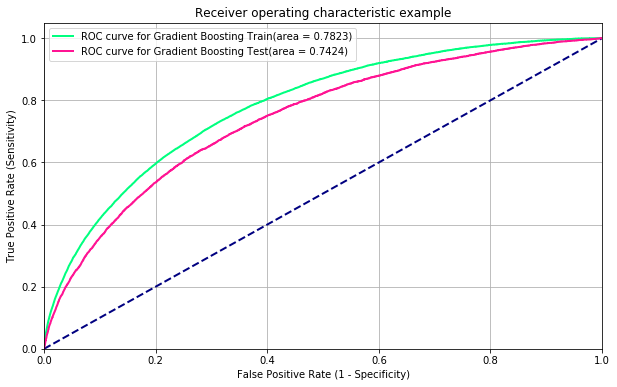

<Figure size 432x288 with 0 Axes>

In [95]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Gradient Boosting Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Gradient Boosting Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('GB3.png',dpi=300,bbox_inches='tight')
y_GB3=y_test
y_pred_GB3=y_pred_prob

ResultGB3={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

### 7. Adaboost Classifier

In [96]:
Train=df
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

AB =AdaBoostClassifier(random_state=0)
start=time.time()
AB.fit(X_train, y_train)
y_pred=AB.predict(X_test)
end=time.time()
y_pred_prob=AB.predict_proba(X_test)[:, 1]
y_train_pred_prob=AB.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Adaboost Classifier is:', round(AB.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Adaboost Classifier is:', round(AB.score(X_test,y_test)*100,4),'%')
print('')
#start=time.time()
#ABScores = cross_val_score(AB, X, y, cv=5)
#end=time.time()
#print('Gradient boosting score Mean with cross val is:',round(np.mean(ABScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 53.209  sec
Correct accuracy of the train set with Adaboost Classifier is: 91.9235 %
Correct accuracy of the test set with Adaboost Classifier is: 91.9623 %


Confusion Matrix is:
[[84709   111]
 [ 7304   129]]

GradClassifier log_loss is: 2.7761

Average precision-recall score: 0.0885


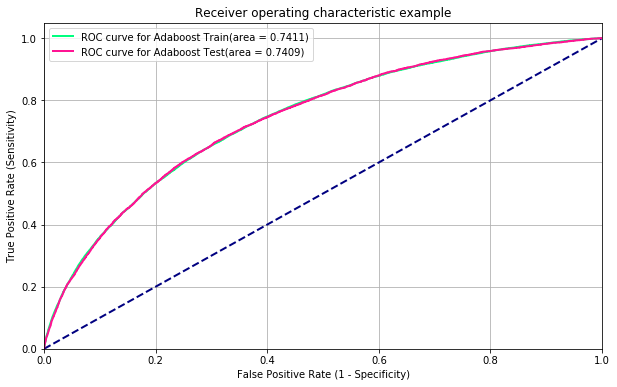

<Figure size 432x288 with 0 Axes>

In [97]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Adaboost Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Adaboost Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('AB1.png',dpi=300,bbox_inches='tight')
y_AB=y_test
y_pred_AB=y_pred_prob


ResultAB1={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

### 8. Adaboost Classifier with 15 Features

In [98]:
X=Train.drop('TARGET',axis=1).iloc[:,list(np.argsort(FeaturesImp))[::-1][:15]]
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

AB =AdaBoostClassifier(random_state=0)
start=time.time()
AB.fit(X_train, y_train)
end=time.time()
y_pred=AB.predict(X_test)
y_pred_prob=AB.predict_proba(X_test)[:, 1]
y_train_pred_prob=AB.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Adaboost Classifier is:', round(AB.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Adaboost Classifier is:', round(AB.score(X_test,y_test)*100,4),'%')
print('')
#start=time.time()
#ABScores = cross_val_score(AB, X, y, cv=5)
#end=time.time()
#print('Adaboost score Mean with cross val is:',round(np.mean(ABScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
print('GradClassifier log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 20.9584  sec
Correct accuracy of the train set with Adaboost Classifier is: 91.9221 %
Correct accuracy of the test set with Adaboost Classifier is: 91.9352 %


Confusion Matrix is:
[[84703   117]
 [ 7323   110]]

GradClassifier log_loss is: 2.7855

Average precision-recall score: 0.0866


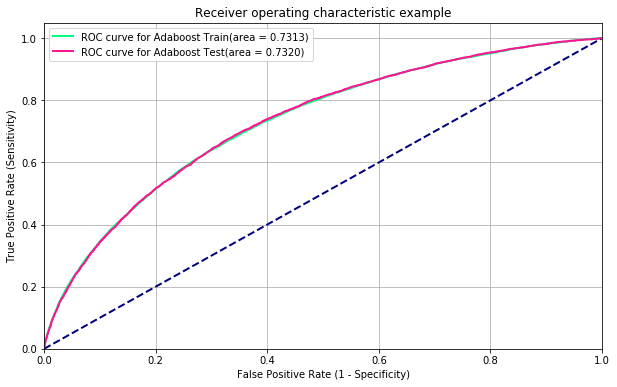

<Figure size 432x288 with 0 Axes>

In [99]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for Adaboost Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
roc_aucTrain=roc_auc
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Adaboost Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('AB2.png',dpi=300,bbox_inches='tight')
y_AB2=y_test
y_pred_AB2=y_pred_prob

ResultAB2={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

### 8. Multi-Layer Perceptron Classifier

In [100]:
Train=df
X=Train.drop('TARGET',axis=1)
y=Train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 


MLP= MLPClassifier(random_state=0)
start=time.time()
MLP.fit(X_train, y_train)
end=time.time()
y_pred=MLP.predict(X_test)
y_pred_prob=MLP.predict_proba(X_test)[:, 1]
y_train_pred_prob=MLP.predict_proba(X_train)[:, 1]
print('Total elapsed time is:', round(end-start,4),' sec')
print('Correct accuracy of the train set with Multi-Layer Perceptron Classifier is:', round(MLP.score(X_train,y_train)*100,4),'%')
print('Correct accuracy of the test set with Multi-Layer Perceptron Classifier is:', round(MLP.score(X_test,y_test)*100,4),'%')
print('')
print('Confusion Matrix is:')
print(confusion_matrix(y_test, y_pred))
print('')
#start=time.time()
#MLPScores = cross_val_score(MLP, X, y, cv=5)
#end=time.time()
#print('MLP score Mean with cross val is:',round(np.mean(MLPScores)*100,4),'%')
#print('Total elapsed time is:', round(end-start,4),' sec')
#print('')
print('MultiLayer Perceptron log_loss is:',round(log_loss(y_test, y_pred),4))
average_precision = average_precision_score(y_test, y_pred)
print('')
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(average_precision))


Total elapsed time is: 85.9586  sec
Correct accuracy of the train set with Multi-Layer Perceptron Classifier is: 91.9709 %
Correct accuracy of the test set with Multi-Layer Perceptron Classifier is: 91.9276 %

Confusion Matrix is:
[[84733    87]
 [ 7360    73]]

MultiLayer Perceptron log_loss is: 2.7881

Average precision-recall score: 0.0843


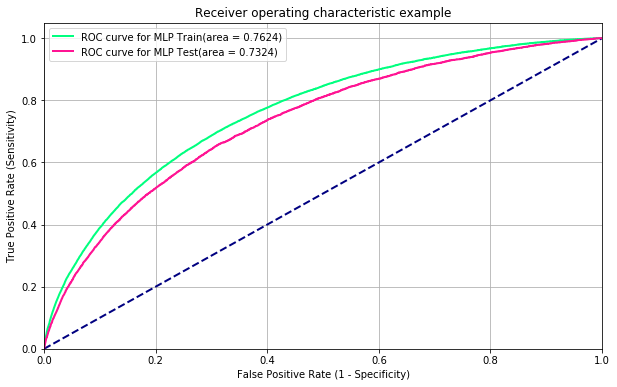

<Figure size 432x288 with 0 Axes>

In [101]:
fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
lw = 2
roc_aucTrain=roc_auc
plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for MLP Train(area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')

fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for MLP Test(area = %0.4f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('MLP.png',dpi=300,bbox_inches='tight')
y_MLP=y_test
y_pred_MLP=y_pred_prob

ResultMLP={'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }

### Comparing AUC of different Classifiers

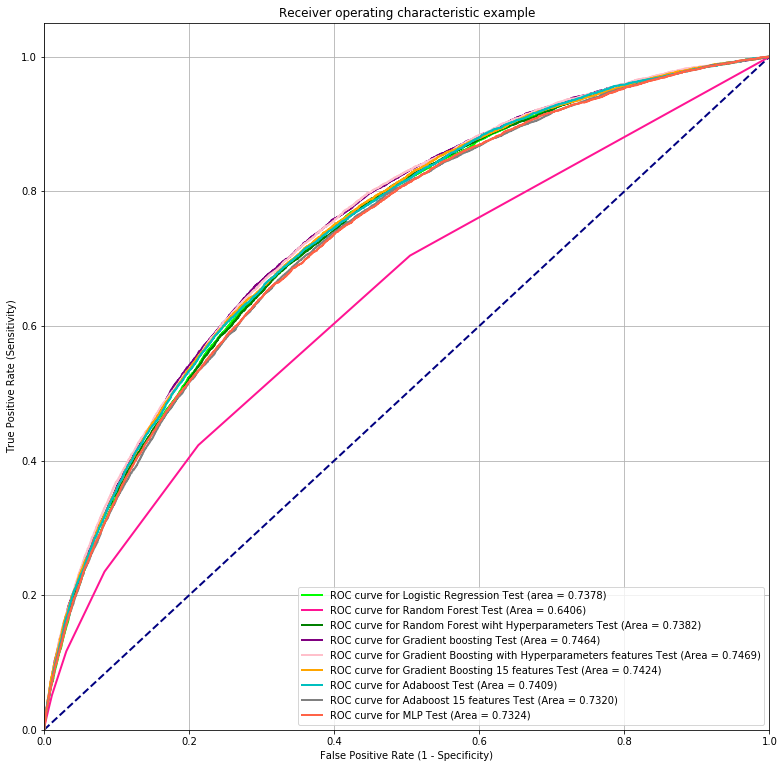

<Figure size 432x288 with 0 Axes>

In [102]:
plt.figure(figsize=(13,13))
lw = 2
plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')

fpr, tpr, thresholds=roc_curve(y_log, y_pred_log)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='lime',lw=lw, label='ROC curve for Logistic Regression Test (area = %0.4f)' % roc_auc)

fpr, tpr, thresholds=roc_curve(y_RF, y_pred_RF)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for Random Forest Test (Area = %0.4f)' % roc_auc)

fpr, tpr, thresholds=roc_curve(y_RF2, y_pred_RF2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green',lw=lw, label='ROC curve for Random Forest wiht Hyperparameters Test (Area = %0.4f)' % roc_auc)

fpr, tpr, thresholds=roc_curve(y_GB, y_pred_GB)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple',lw=lw, label='ROC curve for Gradient boosting Test (Area = %0.4f)' % roc_auc)

fpr, tpr, thresholds=roc_curve(y_GB2, y_pred_GB2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='pink',lw=lw, label='ROC curve for Gradient Boosting with Hyperparameters features Test (Area = %0.4f)' % roc_auc)

fpr, tpr, thresholds=roc_curve(y_GB3, y_pred_GB3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange',lw=lw, label='ROC curve for Gradient Boosting 15 features Test (Area = %0.4f)' % roc_auc)

fpr, tpr, thresholds=roc_curve(y_AB, y_pred_AB)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='c',lw=lw, label='ROC curve for Adaboost Test (Area = %0.4f)' % roc_auc)

fpr, tpr, thresholds=roc_curve(y_AB2, y_pred_AB2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='gray',lw=lw, label='ROC curve for Adaboost 15 features Test (Area = %0.4f)' % roc_auc)


fpr, tpr, thresholds=roc_curve(y_MLP, y_pred_MLP)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tomato',lw=lw, label='ROC curve for MLP Test (Area = %0.4f)' % roc_auc)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)

plt.legend(loc=0)
plt.show()
plt.savefig('allAUC.png',dpi=300,bbox_inches='tight')


In [103]:
print('Logistic Regression:')
print(ResultLG)
print('')
print('Random Forest 1:')
print(ResultRF1)
print('')
print('Random Forest 2:')
print(ResultRF2)
print('')
print('Gradient Boosting 1:')
print(ResultGB1)
print('')
print('Gradient Boosting 2:')
print(ResultGB2)
print('')
print('Gradient Boosting 3:')
print(ResultGB3)
print('')
print('AdaBoost 1:')
print(ResultAB1)
print('')
print('AdaBoost 2:')
print(ResultAB2)
print('')
print('Multi Layer Perceptron:')
print(ResultMLP)

Logistic Regression:
{'AUC Train': 0.7330276441149448, 'AUC Test': 0.7378364811002179, 'Average Precision Score': 0.08345408580469992, 'Log Loss Score': 8.5528, 'Elapsed Time': 3.0186}

Random Forest 1:
{'AUC Train': 0.9997770690589021, 'AUC Test': 0.6406159284515198, 'Average Precision Score': 0.08523054219319204, 'Log Loss Score': 2.8443, 'Elapsed Time': 27.4818}

Random Forest 2:
{'AUC Train': 0.8018110827608217, 'AUC Test': 0.738182086784994, 'Average Precision Score': 0.08081929637080991, 'Log Loss Score': 2.7821, 'Elapsed Time': 133.465}

Gradient Boosting 1:
{'AUC Train': 0.7498122384593047, 'AUC Test': 0.7463714107442823, 'Average Precision Score': 0.08623332261825666, 'Log Loss Score': 2.7802, 'Elapsed Time': 136.039}

Gradient Boosting 2:
{'AUC Train': 0.7822383204352411, 'AUC Test': 0.7468596281620169, 'Average Precision Score': 0.08628451944260458, 'Log Loss Score': 2.784, 'Elapsed Time': 88.794}

Gradient Boosting 3:
{'AUC Train': 0.782262904478312, 'AUC Test': 0.742448717

### Conclusion

| Classifier |AUC Train | AUC Test | Log Loss Score |Precision-Recall Score | Elapsed Time |
| --- | --- | --- |  | | |
| Logistic Regression | 0.733| 0.738 | 8.553| 0.0834| **3.02 sec**|
| Random Forest 1 | 0.999| 0.641 | 2.844| 0.0852| 27.48  sec|
| Random Forest 2| 0.802 |0.738  | 2.782| 0.0808|133.46 sec |
| Gradient Boosting 1| 0.749| 0.746 | 2.780| 0.0862|136.04  sec|
| **Gradient Boosting 2**| 0.782| **0.747** | 2.784| 0.0862|88.79  sec |
| Gradient Boosting 3| 0.782 | 0.742 | 2.792| 0.0853|48.16  sec |
| Adaboost 1| 0.741 |0.741  | **2.776**| 0.0885|53.21  sec |
| Adaboost 2| 0.731 |0.732  | 2.786| 0.0866| 20.96  sec|
| Multilayer Perceptron| 0.762 |0.732  | 2.788| 0.0843|85.96  sec|



- All classifiers are working very close.
- The best result is from Gradient boosting with tuned hyperparameters, although it is slow compare to logistic regression.
- The fastet classifer is logistic regression.